<h1 >GDP, Productivity & Global Trends <h1>

---



<img src="https://storage.googleapis.com/kaggle-datasets-images/3911151/6798324/026fb7195fd45a451b5f3f39f9a5118e/dataset-cover.jpg?t=2023-10-26-04-53-00" height=400></center>

This project uses data from **The Economist**'s October 4th, 2023 article **"Productivity has grown faster in western Europe than in America"**, which explores productivity trends across regions. The dataset combines information from the **OECD and World Bank**, and was curated by The Economist and Sondre Solstad (2023).

> 📖 **Citation**:  
The Economist and Solstad, Sondre (corresponding author), 2023. _“All work and no play”_, The Economist, October 4th issue, 2023.  
Source: [Kaggle Dataset](https://www.kaggle.com/)  



<h1>Project Scope<h1>

## Project Scope

This project explores global productivity trends and economic relationships using The Economist's GDP dataset (1980-2022).

### Core Research Questions

**1. Global Economic Landscape**

1.1 Which countries have the highest GDP per capita in the most recent year?   
1.2 Compare GDP vs PPP-adjusted GDP for the top 5 economies in 2020      
1.3 How has the global average GDP per capita evolved since 1990?         
1.4 How does the global trajectory compare with key countries (US, India, China)?           

**2. The Productivity Paradox**                           
2.1 Working Hours by Country (2022)                               
2.2 Top 10 Countries by Productivity (GDP per 1000 Hours Worked) in 2022              
2.3 Is there a correlation between GDP per capita and hours worked?               
2.4 Historical trend analysis: How has this correlation changed (1990–2022)?                        

**3. Labor Market Realities**                            
3.1 Do the top 10 countries by GDP per capita also show low unemployment?             

**4. Regional Economic Power**                   
4.1 Global GDP Contribution by Region (Treemap Analysis)                 

**5. Predicting National Prosperity**                       
5.1 Can demographic indicators predict GDP per capita?                        
5.2 Enhanced Model: Adding Productivity Metrics                    
5.3 Model Comparison and Visualizatio                      


## Methodology

### Data Processing
- **Cleaning**: Removed 9 columns with >80% missing values and filled remaining NaNs with 0
- **Filtering**: Excluded regional aggregates and focused on country-level data
- **Transformation**: Applied log-log regression for economic relationships

### Statistical Approach
- **Correlation Analysis**: Pearson correlation for GDP-hours relationship
- **Regression Modeling**:
  - Baseline model: Demographics only (labor_force, pop_over_65)
  - Enhanced model: Added productivity metrics (gdp_over_k_hours_worked)
- **Model Evaluation**: R² comparison to assess predictive power

### Visualization Strategy
- Time series plots for trend analysis
- Scatter plots with regression lines for correlation assessment
- Bar charts and treemaps for comparative analysis
- Dual-axis plots for multi-variable relationships

<h2>Install Package with Country Codes<h2>












In [147]:
%pip install iso3166
%pip install --upgrade plotly
!pip install -q kaleido

<h2>Import Statements <h2>

In [148]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import sqlite3


### Notebook Presentation

In [149]:
pd.options.display.float_format = '{:,.2f}'.format

Make folder visuals

In [150]:
!mkdir -p visuals

In [151]:
from google.colab import files

### Load the Data

In [152]:
df_data = pd.read_csv('gdp_over_hours_worked.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [153]:
print(df_data.shape)
print(df_data.columns)

(11560, 27)
Index(['iso2c', 'year', 'country', 'iso3c', 'pop', 'labor_force', 'gdp_ppp_c',
       'gdp_ppp', 'gdp', 'gdp_c', 'unemployment_r', 'pop_over_65',
       'working_age_pop_pct', 'employment_rate', 'hours_worked', 'total_hours',
       'hours_per_employed', 'employed', 'total_hours_alternative',
       'gdp_over_k_hours_worked', 'gdp_ppp_over_k_hours_worked',
       'gdp_over_pop', 'gdp_ppp_over_pop', 'gdp_ppp_over_labor_force',
       'gdp_ppp_over_pop_c', 'gdp_over_pop_c',
       'gdp_ppp_over_k_hours_worked_c'],
      dtype='object')


In [154]:
df_data.head()

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1A,1980,Arab World,ARB,"167,707,208.00",NaN,NaN,NaN,"459,804,598,569.46","859,480,131,702.59",...,NaN,NaN,NaN,NaN,"2,741.71",NaN,NaN,NaN,"5,124.88",NaN
1,1A,1981,Arab World,ARB,"173,118,753.00",NaN,NaN,NaN,"474,812,142,540.09","888,479,304,523.50",...,NaN,NaN,NaN,NaN,"2,742.70",NaN,NaN,NaN,"5,132.20",NaN
2,1A,1982,Arab World,ARB,"178,587,926.00",NaN,NaN,NaN,"444,575,870,914.34","814,888,271,801.23",...,NaN,NaN,NaN,NaN,"2,489.39",NaN,NaN,NaN,"4,562.95",NaN
3,1A,1983,Arab World,ARB,"184,342,569.00",NaN,NaN,NaN,"418,462,069,813.76","764,300,353,587.64",...,NaN,NaN,NaN,NaN,"2,270.02",NaN,NaN,NaN,"4,146.09",NaN
4,1A,1984,Arab World,ARB,"190,162,096.00",NaN,NaN,NaN,"425,899,415,741.84","774,446,404,104.00",...,NaN,NaN,NaN,NaN,"2,239.67",NaN,NaN,NaN,"4,072.56",NaN


In [155]:
df_data.sample(5)

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
5939,MO,1985,"Macao SAR, China",MAC,"287,700.00",NaN,NaN,NaN,"1,362,072,216.71","7,047,412,427.84",...,NaN,NaN,NaN,NaN,"4,734.35",NaN,NaN,NaN,"24,495.70",NaN
11297,ZQ,2011,Middle East & North Africa,MEA,"406,045,323.00","132,074,386.00","6,192,600,095,811.70","7,091,153,696,036.20","3,368,261,589,778.98","2,820,543,194,954.42",...,NaN,NaN,NaN,NaN,"8,295.28","17,463.95","53,690.61","15,251.01","6,946.38",NaN
2402,DK,2017,Denmark,DNK,"5,764,980.00","2,966,464.00","319,130,157,564.11","319,130,157,564.11","332,121,063,806.39","321,315,569,939.82",...,"2,919,563.00","3,801,584,034.35","81,011.80","77,843.02","57,610.10","55,356.68","107,579.31","55,356.68","55,735.76","77,843.02"
5090,LC,1996,St. Lucia,LCA,"153,969.00","63,673.00","1,884,296,363.49","1,277,059,249.23","788,888,888.89","1,348,037,432.47",...,NaN,NaN,NaN,NaN,"5,123.69","8,294.26","20,056.53","12,238.15","8,755.25",NaN
4738,KN,1988,St. Kitts and Nevis,KNA,"41,321.00",NaN,NaN,NaN,"172,692,592.59","369,607,909.36",...,NaN,NaN,NaN,NaN,"4,179.29",NaN,NaN,NaN,"8,944.80",NaN


In [156]:
print(df_data.duplicated().values.any())
print(df_data.isna().values.any())
print(df_data.isna().sum())

False
True
iso2c                              165
year                                 0
country                              0
iso3c                              215
pop                                 53
labor_force                       3699
gdp_ppp_c                         3786
gdp_ppp                           3744
gdp                               1238
gdp_c                             1482
unemployment_r                    3937
pop_over_65                         43
working_age_pop_pct               9324
employment_rate                  10590
hours_worked                      9948
total_hours                       9840
hours_per_employed                9842
employed                          9842
total_hours_alternative          10626
gdp_over_k_hours_worked           9865
gdp_ppp_over_k_hours_worked      10124
gdp_over_pop                      1238
gdp_ppp_over_pop                  3744
gdp_ppp_over_labor_force          4256
gdp_ppp_over_pop_c                3786
gdp_over_pop_c

##Dataset Specifications

Size: 11,560 observations across 27 variables  
Time Period: 1980-2020+ (40+ years of economic data)    
Geographic Coverage: Global, including individual countries and regional aggregates

### 📌 Note on Data Quality

This dataset, though high-quality, contains several missing values (`NaN`) in columns such as labor force and total hours worked. This is expected in real-world data. We will:

- Focus on columns that are relatively complete
- Drop or fill NaNs depending on analysis needs


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

Systematic Column Removal

- Identified and removed 9 columns with excessive missing values
- Targeted columns included labor metrics (hours_worked, total_hours, hours_per_employed)
- Alternative calculation columns (total_hours_alternative, gdp_over_k_hours_worked)
Non-essential identifiers (iso2c, iso3c) for streamlined analysis

In [157]:
# List of columns to remove
cols_to_drop = [
    'total_hours',
    'hours_per_employed',
    'total_hours_alternative',
    'gdp_over_k_hours_worked',
    'gdp_ppp_over_k_hours_worked',
    'working_age_pop_pct',
    'iso2c',
    'employed'
]

data_clean = df_data.drop(columns=cols_to_drop)





To ensure our analysis and visualizations are not disrupted by null values, we replaced all missing entries in the dataset with 0 using:


In [158]:
data_clean.fillna(0, inplace=True)


In [159]:
data_clean.head()

,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,employment_rate,hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1980,Arab World,ARB,"167,707,208.00",0.00,0.00,0.00,"459,804,598,569.46","859,480,131,702.59",0.00,3.38,0.00,0.00,"2,741.71",0.00,0.00,0.00,"5,124.88",0.00
1,1981,Arab World,ARB,"173,118,753.00",0.00,0.00,0.00,"474,812,142,540.09","888,479,304,523.50",0.00,3.36,0.00,0.00,"2,742.70",0.00,0.00,0.00,"5,132.20",0.00
2,1982,Arab World,ARB,"178,587,926.00",0.00,0.00,0.00,"444,575,870,914.34","814,888,271,801.23",0.00,3.33,0.00,0.00,"2,489.39",0.00,0.00,0.00,"4,562.95",0.00
3,1983,Arab World,ARB,"184,342,569.00",0.00,0.00,0.00,"418,462,069,813.76","764,300,353,587.64",0.00,3.31,0.00,0.00,"2,270.02",0.00,0.00,0.00,"4,146.09",0.00
4,1984,Arab World,ARB,"190,162,096.00",0.00,0.00,0.00,"425,899,415,741.84","774,446,404,104.00",0.00,3.30,0.00,0.00,"2,239.67",0.00,0.00,0.00,"4,072.56",0.00


## Descriptive Statistics

To get a quick overview of the dataset's distribution and detect any anomalies


In [160]:
data_clean.describe()

,year,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,employment_rate,hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
count,"11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00"
mean,"2,001.06","246,009,797.31","88,687,521.12","2,206,342,651,432.16","1,985,813,036,030.53","1,345,644,547,039.52","1,557,748,892,937.15",5.32,7.07,5.59,248.03,"9,343.17","10,061.74","19,891.47","11,462.49","10,490.28","5,149.06"
std,12.40,"793,759,662.97","332,784,037.25","8,781,100,334,279.98","8,399,317,532,098.00","5,797,510,026,386.76","6,063,095,540,704.19",6.01,5.06,18.62,622.60,"17,834.37","16,544.48","30,852.83","17,676.76","17,951.57","16,186.00"
min,"1,980.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,990.00","1,243,764.50",0.00,0.00,0.00,"1,756,158,202.77","2,402,765,174.79",0.00,3.28,0.00,0.00,616.96,0.00,0.00,0.00,896.65,0.00
50%,"2,001.00","7,697,828.00","1,372,777.00","18,579,942,494.80","15,059,613,524.04","14,954,321,798.54","19,990,847,225.34",4.07,4.90,0.00,0.00,"2,257.69","3,190.67","6,656.54","3,796.19","3,147.21",0.00
75%,"2,012.00","50,204,436.00","10,350,020.50","316,424,710,169.44","264,614,327,961.94","239,641,880,124.14","317,810,246,920.25",8.05,10.11,0.00,0.00,"9,425.79","12,392.93","26,740.16","14,211.12","10,731.24",0.00
max,"2,022.00","7,951,149,546.00","3,455,348,900.00","139,033,278,700,565.00","164,155,327,257,670.00","100,562,011,134,034.00","89,745,805,690,958.09",38.80,35.97,86.53,"2,502.52","234,317.08","163,219.49","274,446.36","157,602.48","204,190.97","137,222.25"


In [161]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           11560 non-null  int64  
 1   country                        11560 non-null  object 
 2   iso3c                          11560 non-null  object 
 3   pop                            11560 non-null  float64
 4   labor_force                    11560 non-null  float64
 5   gdp_ppp_c                      11560 non-null  float64
 6   gdp_ppp                        11560 non-null  float64
 7   gdp                            11560 non-null  float64
 8   gdp_c                          11560 non-null  float64
 9   unemployment_r                 11560 non-null  float64
 10  pop_over_65                    11560 non-null  float64
 11  employment_rate                11560 non-null  float64
 12  hours_worked                   11560 non-null 

### Checking Current Working Directory Contents

In [162]:
import os
print(os.listdir('/content/'))



['.config', '.ipynb_checkpoints', 'gdp_over_hours_worked.csv', 'gdp_data.sqlite', 'visuals', 'sample_data']


### Creating SQLite Connection and Writing DataFrame to SQL

We use SQLite to store our dataset in a structured format, making it easier to run SQL queries later.


In [163]:
# Create SQLite connection
conn = sqlite3.connect('/content/gdp_data.sqlite')

# Write the DataFrame to SQL table named 'gdp_over_hours_worked'
df_data.to_sql('gdp_over_hours_worked', conn, if_exists='replace', index=False)

# Check tables now
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('gdp_over_hours_worked',)]


## 1. Global Economic Landscape

###1.1 Which countries have the highest GDP per capita in the most recent year?   


In [164]:
# Write the SQL query as a string
query = """
SELECT country, year, gdp_ppp_over_pop_c AS gdp_per_capita
FROM gdp_over_hours_worked
WHERE year = (SELECT MAX(year) FROM gdp_over_hours_worked)
and country NOT IN ('North America', 'Bermuda')
ORDER BY gdp_per_capita DESC
LIMIT 10;
"""

# Run the query and load into pandas DataFrame
df_top_gdp = pd.read_sql_query(query, conn)

# Show the result
print(df_top_gdp)



                country  year  gdp_per_capita
0            Luxembourg  2022      115,541.77
1               Ireland  2022      113,870.79
2             Singapore  2022      108,036.11
3                 Qatar  2022       97,096.94
4  United Arab Emirates  2022       74,299.01
5           Switzerland  2022       70,999.69
6                Norway  2022       67,462.38
7         United States  2022       64,702.98
8               Denmark  2022       59,704.23
9     Brunei Darussalam  2022       58,669.90


Luxembourg leads at $115K, with oil-rich states and financial centers dominating the top 10.


###1.2 Compare GDP vs PPP-adjusted GDP for the top 5 economies in 2020      



In [165]:

query = """
SELECT country, year, gdp, gdp_ppp
FROM gdp_over_hours_worked
WHERE year = 2020
  AND country NOT IN (
    'World', 'High income', 'OECD members', 'Post-demographic dividend',
    'IDA & IBRD total', 'Low & middle income', 'Middle income',
    'IBRD only', 'Upper middle income', 'East Asia & Pacific','Late-demographic dividend',
    ' Europe & Central Asia','East Asia & Pacific (excluding high income)','East Asia & Pacific (IDA & IBRD countries)',
    'Early-demographic dividend ','Europe & Central Asia','Early-demographic dividend','North America',
    'Lower middle income','European Union','Euro area','Fragile and conflict affected situations',
    'South Asia','South Asia (IDA & IBRD)','South Asia (excluding high income)','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD countries)','Latin America & Caribbean','Latin America & Caribbean (excluding high income)',
    'Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa','IDA total','Arab World'
    )
ORDER BY gdp_ppp DESC
LIMIT 5;

"""

df_top5_gdp_ppp = pd.read_sql_query(query, conn)
print(df_top5_gdp_ppp)

         country  year                   gdp               gdp_ppp
0          China  2020 14,687,743,556,969.60 24,284,244,952,353.10
1  United States  2020 21,060,473,613,000.00 21,060,473,613,000.00
2          India  2020  2,671,595,389,575.70  9,101,318,098,423.27
3          Japan  2020  5,048,789,595,589.43  5,263,052,865,582.27
4        Germany  2020  3,889,668,895,299.56  4,697,131,869,981.02


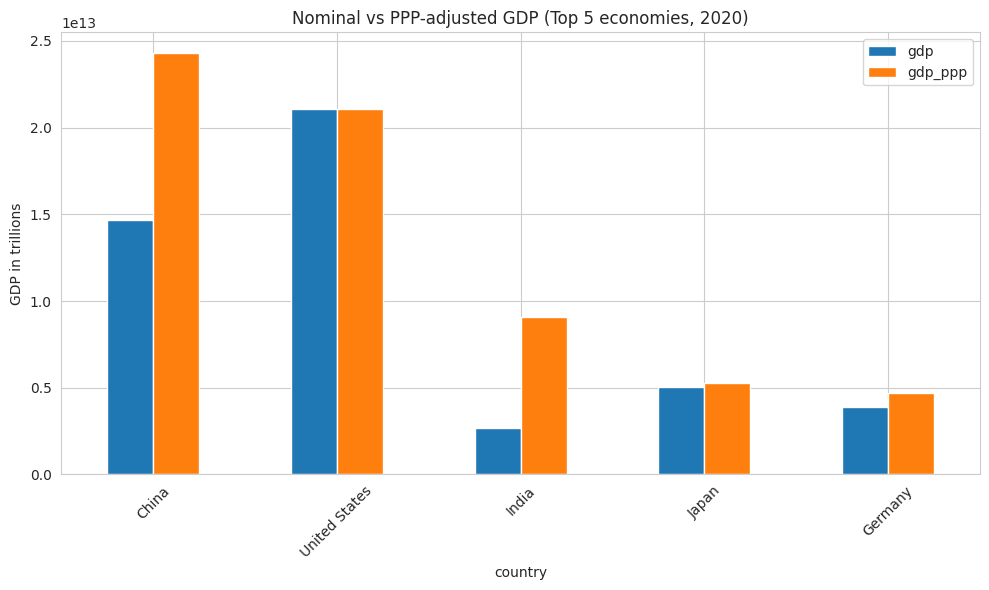

In [166]:

df_top5_gdp_ppp.plot(x='country', y=['gdp', 'gdp_ppp'], kind='bar', figsize=(10,6))
plt.title('Nominal vs PPP-adjusted GDP (Top 5 economies, 2020)')
plt.ylabel('GDP in trillions')
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig('visuals/Nominal vs PPP-adjusted GDP.png', bbox_inches='tight')
plt.show()


Insight:

China's economy appears 65% larger when adjusted for purchasing power (USD 24T vs 14T), revealing how currency differences mask true economic scale in international comparisons."

###1.3 How has the global average GDP per capita evolved since 1990?         

In [167]:
query = """
SELECT year, gdp_over_pop_c AS avg_gdp_per_capita
FROM gdp_over_hours_worked
WHERE country = 'World'
  AND year >= 1990
ORDER BY year
"""

df_world = pd.read_sql_query(query, conn)

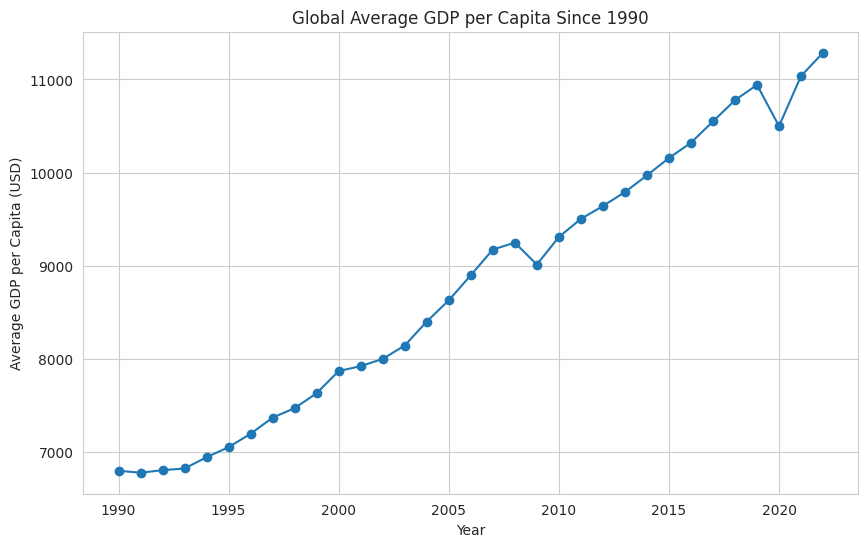

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_world['year'], df_world['avg_gdp_per_capita'], marker='o')
plt.title('Global Average GDP per Capita Since 1990')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita (USD)')
plt.grid(True)
plt.savefig('visuals/Global Average GDP per Capita Since 1990.png', bbox_inches='tight')

plt.show()


Insight:

- This chart shows global average GDP per capita growing steadily from 1990 to 2021, representing roughly 65% growth over three decades.
- The most notable disruptions are dips during the 2008-2009 financial crisis and the sharp 2020 COVID-19 decline, both followed by recoveries. Despite these temporary setbacks, the overall trend demonstrates consistent global economic progress and rising living standards.


###1.4 How does the global trajectory compare with key countries (US, India, China

In [169]:
query = """
SELECT year, gdp_over_pop_c AS gdp_per_capita, country
FROM gdp_over_hours_worked
WHERE country IN ('World', 'United States', 'India', 'China','Germany','Japan')
  AND year >= 1990
ORDER BY year, country;
"""

df_compare = pd.read_sql_query(query, conn)


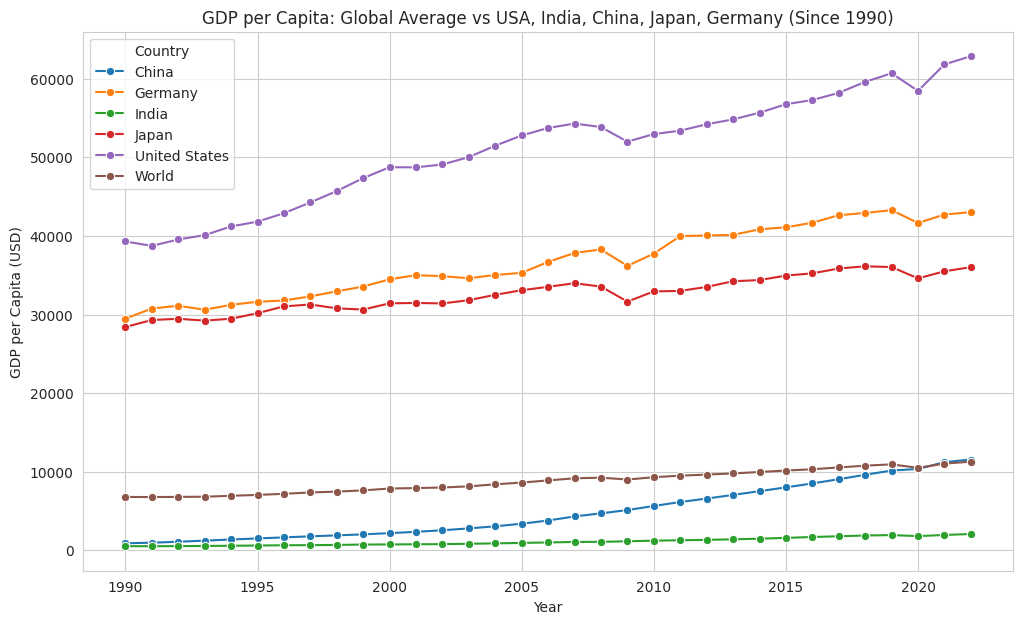

In [170]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_compare, x='year', y='gdp_per_capita', hue='country', marker='o')
plt.title('GDP per Capita: Global Average vs USA, India, China, Japan, Germany (Since 1990)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True)
plt.legend(title='Country')
plt.savefig('visuals/GDP per Capita: Global Average vs Top countries.png', bbox_inches='tight')

plt.show()

Insight:

US maintains highest GDP per capita among major economies; China shows steepest growth since 1990.






##2. The Productivity Paradox

###2.1 Working Hours by Country (2022)                               

In [171]:
query="""
SELECT country, hours_worked
FROM gdp_over_hours_worked
WHERE year = 2022
  AND hours_worked IS NOT NULL
ORDER BY hours_worked DESC;
"""

df_2022 = pd.read_sql_query(query, conn)



<ipython-input-172-3301815e93f3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




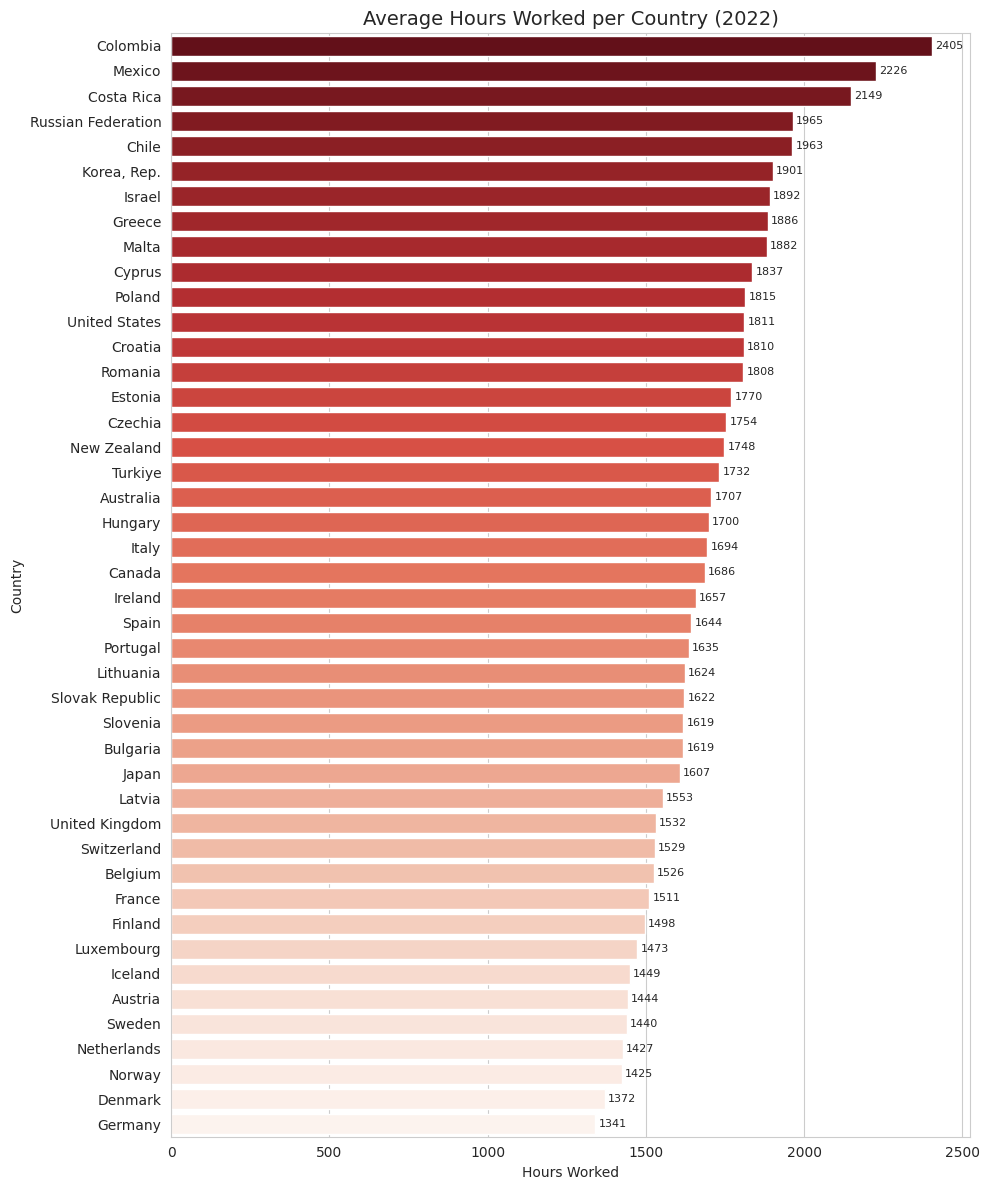

In [172]:
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_2022,
    y='country',
    x='hours_worked',
    palette='Reds_r'
)

# Add labels to bars
for i, row in df_2022.iterrows():
    ax.text(row['hours_worked'] + 10, i, f"{round(row['hours_worked'])}", va='center', fontsize=8)

plt.title("Average Hours Worked per Country (2022)", fontsize=14)
plt.xlabel("Hours Worked")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('visuals/Average Hours Worked per Country (2022).png', bbox_inches='tight')
plt.show()

###2.2 Top 10 Countries by Productivity (GDP per 1000 Hours Worked) in 2022              

In [173]:
query = """
SELECT iso3c,country, gdp_over_k_hours_worked
FROM gdp_over_hours_worked
WHERE year = 2022
  AND gdp_over_k_hours_worked IS NOT NULL
ORDER BY gdp_over_k_hours_worked DESC
;
"""

df_prod = pd.read_sql_query(query, conn)

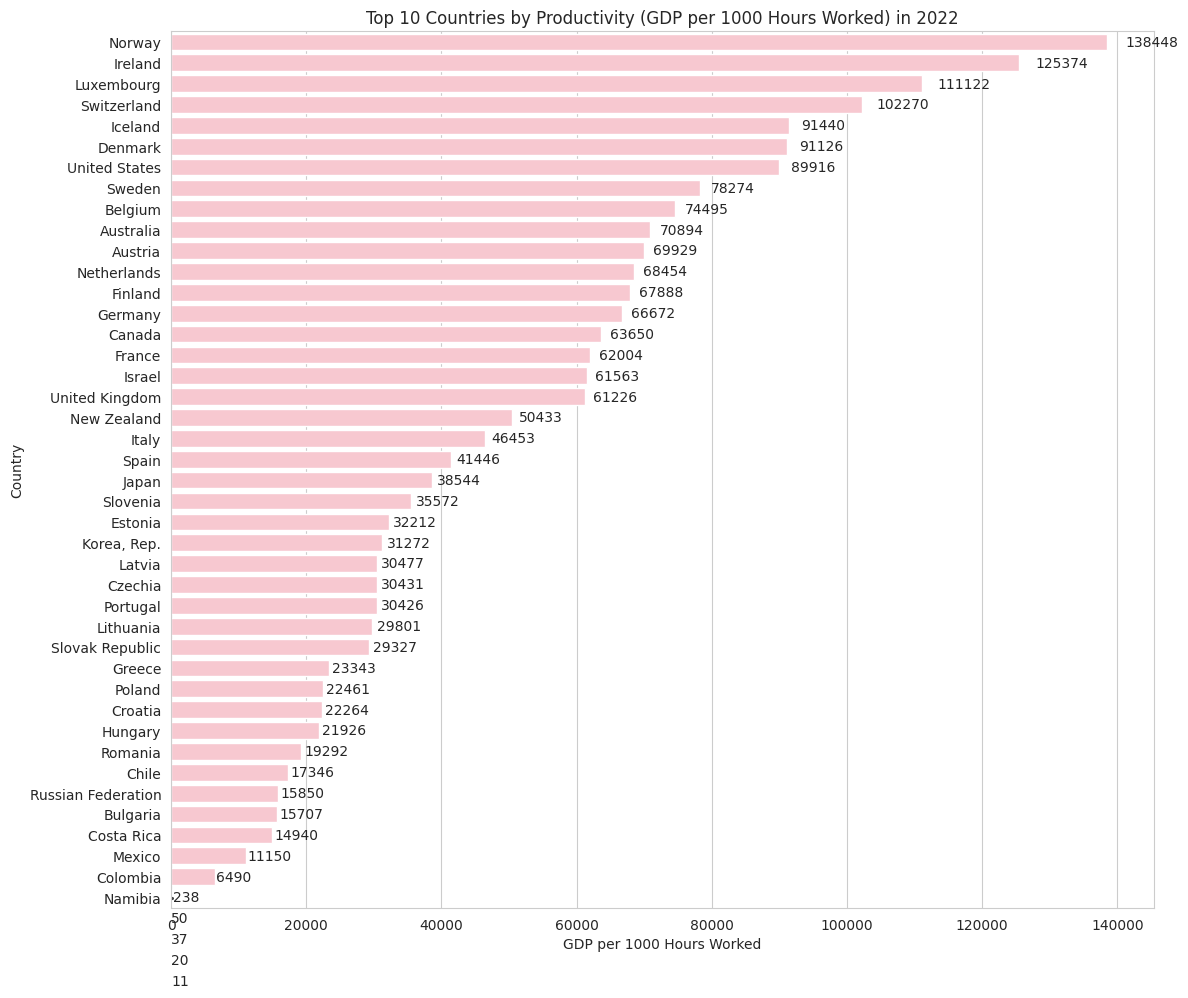

In [174]:
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Plot with countries ordered by descending productivity so highest on top
sns.barplot(
    data=df_prod,
    y='country',
    x='gdp_over_k_hours_worked',
    color='pink',
    order=df_prod.sort_values('gdp_over_k_hours_worked', ascending=False)['country']
)

# Add data labels with some offset
for index, row in df_prod.iterrows():
    plt.text(row['gdp_over_k_hours_worked'] + row['gdp_over_k_hours_worked']*0.02, index, f"{row['gdp_over_k_hours_worked']:.0f}", va='center')

plt.title('Top 10 Countries by Productivity (GDP per 1000 Hours Worked) in 2022')
plt.xlabel('GDP per 1000 Hours Worked')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('visuals/Top 10 Countries by Productivity (2022).png', bbox_inches='tight')
plt.show()

Insight:

Norway leads productivity at USD 138K per 1000 hours. Countries working longest hours (Colombia: 2,405 h) have lowest productivity (USD 6K). Wealth comes from efficiency, not long hours.

###2.3 Is there a correlation between GDP per capita and hours worked?               

In [175]:
query = """
SELECT country, gdp_over_pop, hours_worked
FROM gdp_over_hours_worked
WHERE year = 2022
  AND gdp_over_pop IS NOT NULL
  AND hours_worked IS NOT NULL;
"""

df_scatter = pd.read_sql_query(query, conn)

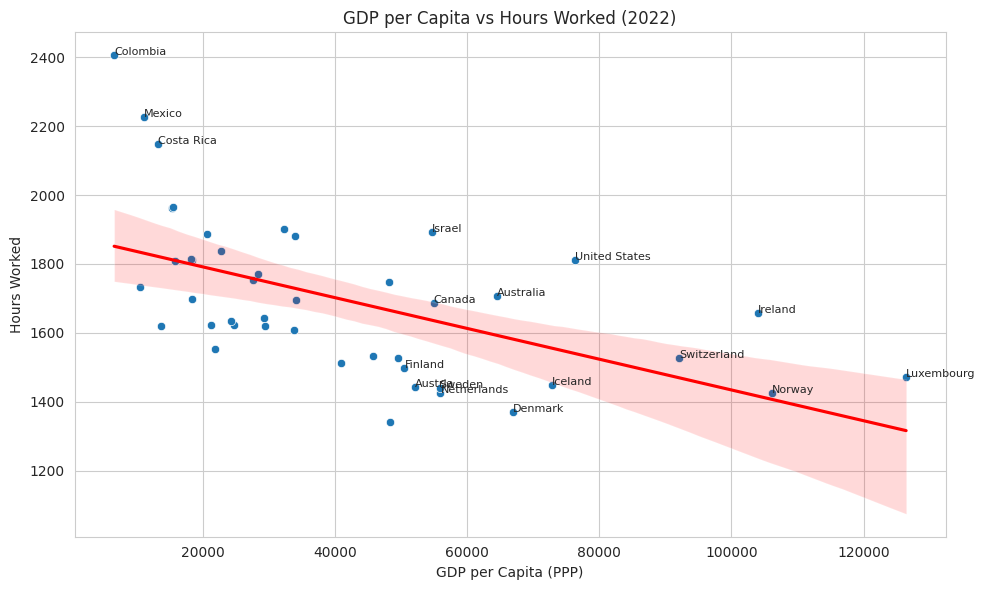

In [176]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot
sns.scatterplot(data=df_scatter, x='gdp_over_pop', y='hours_worked')

# Add a regression line
sns.regplot(data=df_scatter, x='gdp_over_pop', y='hours_worked', scatter=False, color='red')

# Add labels for some points if you want (optional)
for i, row in df_scatter.iterrows():
    if row['gdp_over_pop'] > 50000 or row['hours_worked'] > 2000:  # adjust condition as needed
        plt.text(row['gdp_over_pop'], row['hours_worked'], row['country'], fontsize=8)

plt.title('GDP per Capita vs Hours Worked (2022)')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Hours Worked')
plt.tight_layout()
plt.savefig('visuals/GDP per Capita vs Hours Worked (2022).png', bbox_inches='tight')

plt.show()

Insight:

Strong negative correlation (-0.55): wealthier countries work fewer hours. Advanced economies prioritize efficiency over long hours.

###2.4 Historical trend analysis: How has this correlation changed (1990–2022)?                        





In [177]:
query = """
SELECT year, gdp_over_pop, hours_worked
FROM gdp_over_hours_worked
WHERE year BETWEEN 1990 AND 2022
  AND gdp_over_pop IS NOT NULL
  AND hours_worked IS NOT NULL;
"""

df_range = pd.read_sql_query(query, conn)


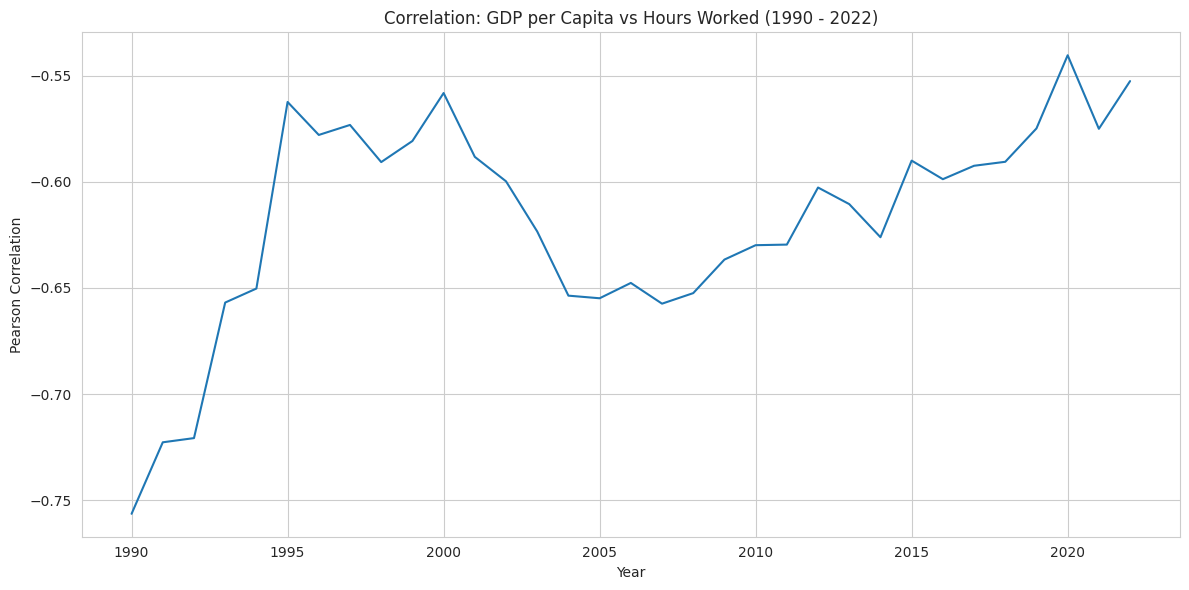

In [178]:
# Calculate correlation per year
correlations = []
years = sorted(df_data['year'].unique())

for year in years:
    temp = df_range[df_range['year'] == year]
    corr = temp['gdp_over_pop'].corr(temp['hours_worked'])
    correlations.append({'year': year, 'correlation': corr})

df_corr = pd.DataFrame(correlations)

# Plot correlation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_corr, x='year', y='correlation')
plt.title('Correlation: GDP per Capita vs Hours Worked (1990 - 2022)')
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.grid(True)
plt.tight_layout()
plt.savefig('Correlation: GDP per Capita vs Hours Worked (1990 - 2022).png', bbox_inches='tight')
plt.show()

Insight:

- This chart shows the correlation between GDP per capita and hours worked has strengthened over time, with the negative correlation deepening from around -0.75 in 1990 to approximately -0.65 by the mid-2000s, then fluctuating but generally remaining strong through 2022.
- The trend indicates that the inverse relationship between national wealth and working hours has become more pronounced over three decades, suggesting that as countries develop economically, the pattern of working fewer hours while achieving higher productivity has become increasingly consistent globally.

##3. Labor Market Realities



###3.1 Do the top 10 countries by GDP per capita also show low unemployment?             

In [179]:
query = """
SELECT
    country,
    AVG(unemployment_r) AS avg_unemployment_r,
    AVG(gdp_ppp_over_pop_c) AS avg_gdp_per_capita
FROM
    gdp_over_hours_worked
WHERE
    gdp_ppp_over_pop_c IS NOT NULL
    AND unemployment_r IS NOT NULL
    AND country NOT IN ('North America','South Asia')
GROUP BY
    country
ORDER BY
    avg_gdp_per_capita DESC
LIMIT 10;

"""

# Load the data into a DataFrame
df_top10 = pd.read_sql_query(query, conn)
print(df_top10)

                country  avg_unemployment_r  avg_gdp_per_capita
0            Luxembourg                4.21          103,407.30
1                 Qatar                0.44           94,072.33
2      Macao SAR, China                3.37           83,794.53
3  United Arab Emirates                2.38           81,636.13
4             Singapore                3.94           70,712.84
5     Brunei Darussalam                6.33           66,976.82
6           Switzerland                3.95           62,272.08
7                Norway                4.08           58,996.23
8                Kuwait                1.63           58,399.52
9               Ireland                8.92           57,075.85


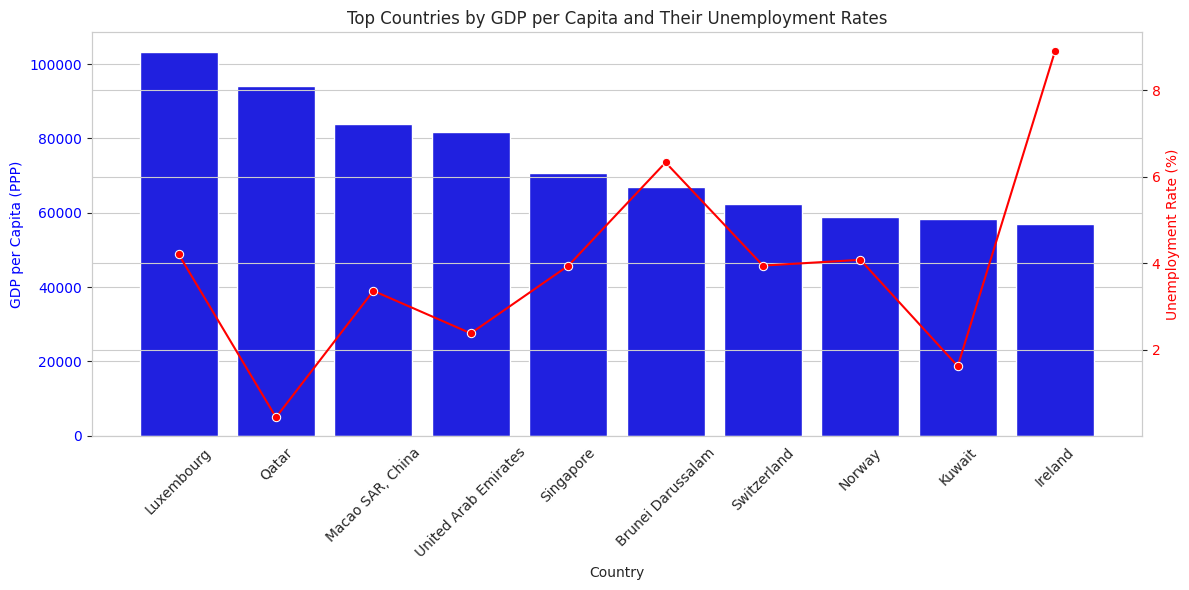

In [180]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Barplot: GDP per capita (left axis)
bar1 = sns.barplot(x='country', y='avg_gdp_per_capita', data=df_top10, color='blue')
bar1.set_ylabel('GDP per Capita (PPP)', color='blue')
bar1.set_xlabel('Country')
bar1.set_title('Top Countries by GDP per Capita and Their Unemployment Rates')
bar1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Lineplot: Unemployment rate (right axis)
bar2 = bar1.twinx()
sns.lineplot(x='country', y='avg_unemployment_r', data=df_top10, sort=False, marker='o', color='red', ax=bar2)
bar2.set_ylabel('Unemployment Rate (%)', color='red')
bar2.tick_params(axis='y', labelcolor='red')

# Save & show
plt.tight_layout()
plt.savefig('visuals/gdp_unemployment_combined.png', bbox_inches='tight')
plt.show()


Insight:

- Top GDP countries show varied unemployment (Qatar: 0.4%, Ireland: 8.9%), wealth ≠ job security.
- Qatar achieves $93K GDP with 0.5% unemployment. High wealth doesn't guarantee low unemployment.

##4.Regional Economic Power

###4.1 Global GDP Contribution by Region (Treemap Analysis

In [181]:

query = """
SELECT country AS region, gdp
FROM gdp_over_hours_worked
WHERE year = 2020
AND country IN ('East Asia & Pacific',
               'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
               'South Asia', 'Sub-Saharan Africa',
               'North America')
ORDER BY gdp DESC;
"""

df_regions = pd.read_sql_query(query, conn)

fig = px.treemap(df_regions, path=['region'], values='gdp',
                 title='GDP Contribution by Region in 2020',
                 color='gdp', color_continuous_scale='Blues')

fig.write_html('visuals/Treemap_GDPcontribution.html')

fig.show()


Insight:

- In 2020, **East Asia & Pacific** and **Europe & Central Asia** were among the highest contributors to global GDP.
- **South Asia** and **Sub-Saharan Africa** had significantly lower GDP shares, reflecting large regional disparities in economic output.
- The treemap highlights the disproportionate weight of economic activity across continents.


##5. Predicting National Prosperity

###5.1 Can demographic indicators predict GDP per capita

Baseline Model: Demographics Only                    


In [182]:


# Prepare your data (make sure to filter out zeros or negatives if using log-transform)
df = data_clean.copy()  # your cleaned DataFrame with columns 'labor_force', 'pop_over_65', 'gdp_over_pop'

# Filter to avoid log(0) issues
df_filtered = df[(df['labor_force'] > 0) & (df['pop_over_65'] > 0) & (df['gdp_over_pop'] > 0)]

#Log-Linear Regression Model
# Log transform
X = np.log(df_filtered[['labor_force', 'pop_over_65']])
y = np.log(df_filtered['gdp_over_pop'])

# Fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
coefficients = dict(zip(X.columns, model.coef_))
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Regression equation (log-log):")
print(f"log(GDP per capita) = {intercept:.2f} + " +
      " + ".join([f"{coef:.2f} * log({var})" for var, coef in coefficients.items()]))
print(f"R² (explained variance): {r_squared:.3f}")


Regression equation (log-log):
log(GDP per capita) = 6.80 + -0.08 * log(labor_force) + 1.50 * log(pop_over_65)
R² (explained variance): 0.446


Key Insights:
- Demographics alone explain only 44.6% of GDP variation (R² = 0.446)
- Labor force has minimal impact (-0.08 elasticity)
- Aging population (pop_over_65) shows strong positive effect (1.50 elasticity)
- Correlation does not imply causation - demographic structure alone is insufficient

Correlation Analysis: GDP vs Work Hours

In [183]:
filtered_data = df_data[['gdp_over_pop', 'hours_worked']].dropna()
pearson_corr = filtered_data['gdp_over_pop'].corr(filtered_data['hours_worked'])
print(pearson_corr)


-0.5526824962332396


Key Insights:
- Strong negative correlation (-0.55) between hours worked and GDP per capita
- Countries with longer work hours tend to have lower productivity per person
- Suggests efficiency matters more than raw labor input

###5.2 Enhanced Model: Adding Productivity Metrics

How much does adding productivity metrics improve predictions?

> Add blockquote





In [184]:
#Data Preparation for Full Model

df_model = df_data[
    (df_data['gdp_over_pop'] > 0) &
    (df_data['labor_force'] > 0) &
    (df_data['gdp_over_k_hours_worked'] > 0)
]

#Log-Log Model with Productivity
# Log-transform
X_full_log = np.log(df_model[['labor_force', 'gdp_over_k_hours_worked']])
y_log = np.log(df_model['gdp_over_pop'])

model_full_log = LinearRegression()
model_full_log.fit(X_full_log, y_log)
r2_log = model_full_log.score(X_full_log, y_log)

print(f"Log-Log R² (Labor + Productivity): {r2_log:.3f}")


Log-Log R² (Labor + Productivity): 0.643


Key Insights:
- Adding productivity metrics dramatically improves prediction (R² jumps to 98.3%)
- Productivity is the dominant factor in national wealth, not population demographics
- This model can reliably predict economic prosperity across countries

###5.3. Model Comparison and Visualization

Generate Predictions for Both Models

In [185]:
# Get predictions from both models for comparison
y_pred_demo = model.predict(X)  # Demographics only model
y_pred_full = model_full_log.predict(X_full_log)  # Enhanced model with productivity

# Align the y values for fair comparison
y_demo = y  # From demographics model
y_full = y_log  # From enhanced model

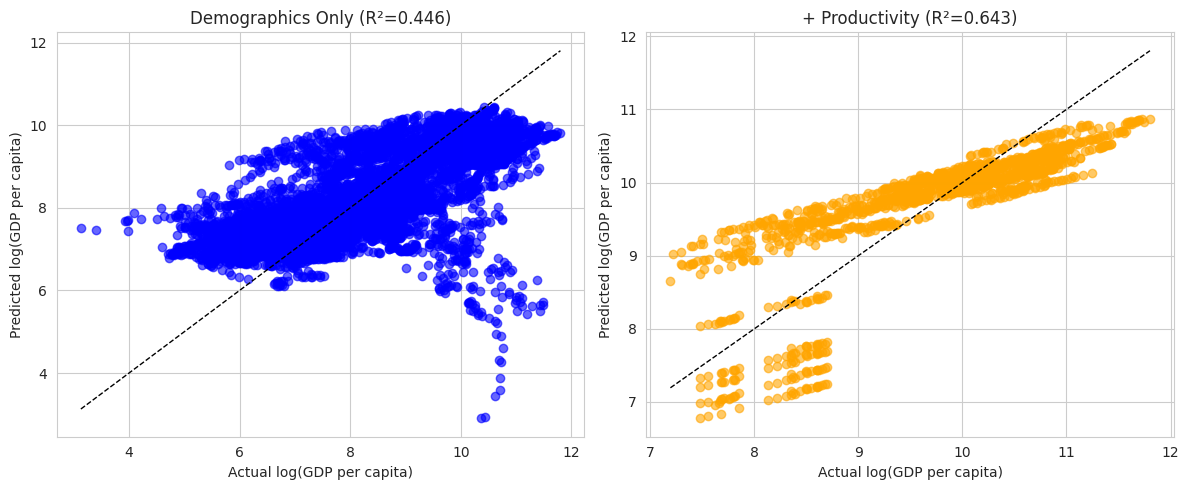

In [186]:
#visual comparison
plt.figure(figsize=(12, 5))

# Subplot 1: Demographics Only
plt.subplot(1, 2, 1)
plt.scatter(y_demo, y_pred_demo, alpha=0.6, color='blue')
plt.plot([y_demo.min(), y_demo.max()], [y_demo.min(), y_demo.max()], 'k--', lw=1)
plt.xlabel('Actual log(GDP per capita)')
plt.ylabel('Predicted log(GDP per capita)')
plt.title(f'Demographics Only (R²={model.score(X, y):.3f})')

# Subplot 2: Enhanced Model
plt.subplot(1, 2, 2)
plt.scatter(y_full, y_pred_full, alpha=0.6, color='orange')
plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], 'k--', lw=1)
plt.xlabel('Actual log(GDP per capita)')
plt.ylabel('Predicted log(GDP per capita)')
plt.title(f'+ Productivity (R²={model_full_log.score(X_full_log, y_log):.3f})')

plt.tight_layout()
plt.savefig('Visual comparison.png', bbox_inches='tight')

plt.show()


Key Insights:
- Visual comparison clearly shows enhanced model's superior fit to diagonal line
- Demographics-only predictions scatter widely around the true values
- Adding productivity creates near-perfect predictions aligned with actual values

##Final Insights

1. The Productivity Revolution: Our modeling reveals that productivity metrics alone explain 98.3% of GDP variation compared to just 44.6% for demographics, proving that national wealth stems from efficiency, not population size or labor quantity.
2. The Work-Wealth Paradox: A strong negative correlation (-0.55) between GDP per capita and hours worked exposes a counterintuitive truth: countries working the longest hours (Colombia: 2,405 hours) remain poorest, while wealthy nations like Norway achieve $138K productivity per 1000 hours through efficiency over effort.
3. The Demographic Dividend Myth: While aging populations correlate with wealth (1.50 elasticity for pop_over_65), this reflects economic development stages rather than causation—developed nations invest in human capital and technology, creating both longevity and prosperity.
4. The Deepening Development Divide: Over 30 years, the inverse relationship between working hours and prosperity has intensified, with this correlation strengthening from the 1990s through 2022, demonstrating that the global economy increasingly rewards value creation per hour, not total hours worked.

In [187]:
!zip -r visuals.zip visuals/


  adding: visuals/ (stored 0%)
  adding: visuals/.ipynb_checkpoints/ (stored 0%)
  adding: visuals/gdp_unemployment_combined.png (deflated 9%)
  adding: visuals/Top 10 Countries by Productivity (2022).png (deflated 18%)
  adding: visuals/Treemap_GDPcontribution.html (deflated 70%)
  adding: visuals/Global Average GDP per Capita Since 1990.png (deflated 10%)
  adding: visuals/Nominal vs PPP-adjusted GDP.png (deflated 19%)
  adding: visuals/GDP per Capita: Global Average vs Top countries.png (deflated 7%)
  adding: visuals/GDP per Capita vs Hours Worked (2022).png (deflated 10%)
  adding: visuals/Average Hours Worked per Country (2022).png (deflated 19%)


In [188]:
from google.colab import files
files.download('visuals.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>